# Algoritmo K-Means

**K-Means** é um algoritmo de aprendizado não supervisionado usado para **agrupamento (clustering)** de dados. Seu objetivo é particionar um conjunto de dados em **K grupos distintos** (clusters), onde cada ponto pertence ao grupo com o **centróide mais próximo**.

## Como o K-Means funciona?

1. **Inicialização**: Escolhe K centróides aleatoriamente.
2. **Atribuição**: Cada ponto é atribuído ao centróide mais próximo.
3. **Atualização**: Recalcula-se os centróides como a média dos pontos atribuídos a cada grupo.
4. **Repetição**: Repete os passos 2 e 3 até que os centróides não mudem mais (convergência).

## Para que serve?

- Redução de dimensionalidade (combinado com outras técnicas)
- Compressão de imagens
- Agrupamento de clientes em marketing
- Segmentação de mercado
- Detecção de padrões

## Limitações

- É sensível à **inicialização dos centróides**.
- Pode convergir para **mínimos locais**.
- Assumem que os clusters são aproximadamente esféricos e de tamanho similar.

## Métricas

- **Inércia (inertia_)**: Soma das distâncias quadradas entre os pontos e seus centróides.
- **Score**: Negativo da inércia (pois o `.score()` do `sklearn` segue a lógica "quanto maior, melhor").

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns

In [5]:
sns.set(style='whitegrid')

# gerar dados com 5 clusters
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.80, random_state=42)

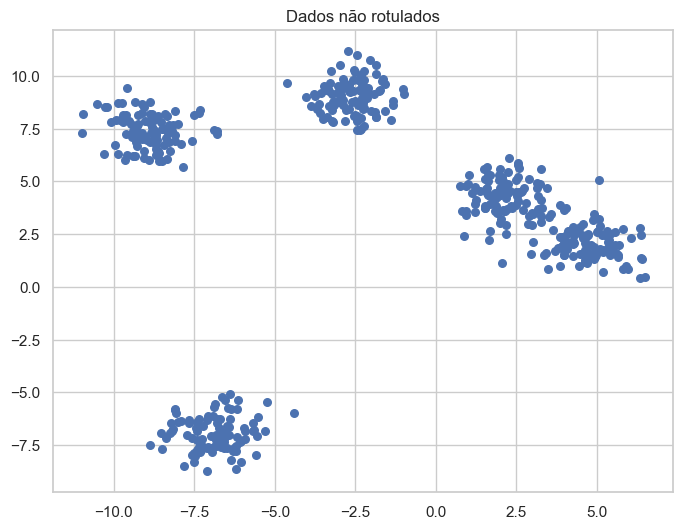

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Dados não rotulados")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

y_kmeans = kmeans.fit_predict(X)

c:\Users\BeatrizAlmeida\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


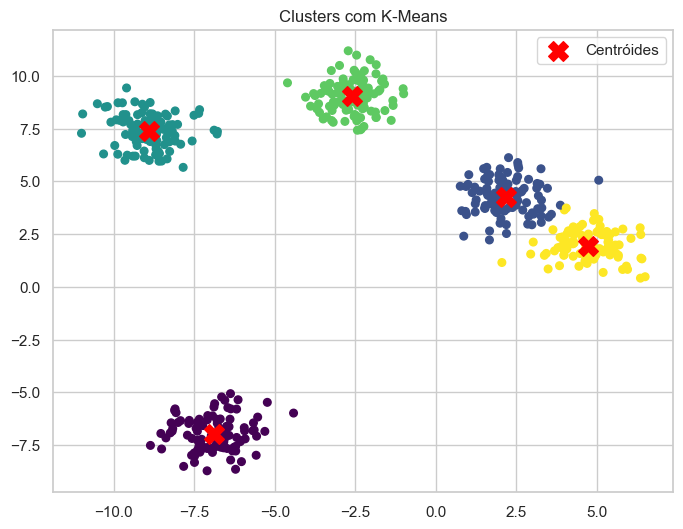

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centróides')
plt.title("Clusters com K-Means")
plt.legend()
plt.show()

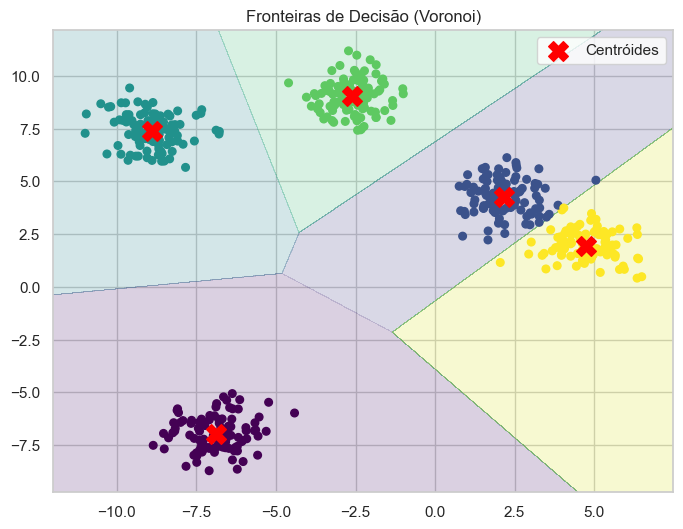

In [9]:
def plot_decision_boundaries(X, model):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=30, cmap='viridis')
    plt.scatter(model.cluster_centers_[:, 0], 
                model.cluster_centers_[:, 1], 
                s=200, c='red', marker='X', label='Centróides')
    plt.title("Fronteiras de Decisão (Voronoi)")
    plt.legend()
    plt.show()

plot_decision_boundaries(X, kmeans)

In [10]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

c:\Users\BeatrizAlmeida\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\BeatrizAlmeida\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\BeatrizAlmeida\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\BeatrizAlmeida\anaconda3\envs\myenv\lib\site-packages\sklearn\clust

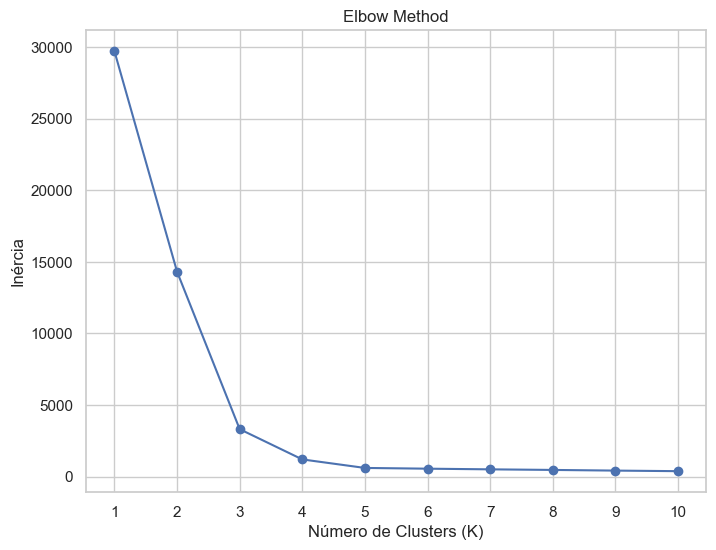

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, 'o-')
plt.title("Elbow Method")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia")
plt.xticks(K_range)
plt.grid(True)
plt.show()